# Imports

In [1]:
import nltk
import string
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from matplotlib import pyplot as plt


# Load datasets into a panda's dataframe

In [2]:
# Load CSVs
file0 = '/Users/benjaminmartin/Downloads/archive-1/True.csv'
file1 = '/Users/benjaminmartin/Downloads/archive-1/Fake.csv'

# Store datasets in Pandas Dataframes
df0 = pd.read_csv(file0)
df1 = pd.read_csv(file1)

# Preprocessing

In [3]:
#Create target data
df0['target'] = 0
df1['target'] = 1

#Concatinate both CSVs
df = pd.concat([df0, df1])
df = df.reset_index(drop = True)

#Shuffle data
df = shuffle(df)
df = df.reset_index(drop=True)

#Convert the text to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
df0['text'] = df0['text'].apply(lambda x: x.lower())
df1['text'] = df1['text'].apply(lambda x: x.lower())

#Removing punctuation 
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)
df0['text'] = df0['text'].apply(punctuation_removal)
df1['text'] = df1['text'].apply(punctuation_removal)

#Removing Stopwords 
nltk.download('stopwords')
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df0['text'] = df0['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df1['text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjaminmartin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Exploration

## Data Exploration: Text Length

In [4]:
#Calculating lengh of titles and text
def lengh(df):
    return len(df)

#Apply lengh function to df, df0, df1:
df['title_lengh'] = df['title'].apply(lengh)
df['text_lengh'] = df['text'].apply(lengh)
df0['title_lengh'] = df0['title'].apply(lengh)
df0['text_lengh'] = df0['text'].apply(lengh)
df1['title_lengh'] = df1['title'].apply(lengh)
df1['text_lengh'] = df1['text'].apply(lengh)

(0.0, 10000.0)

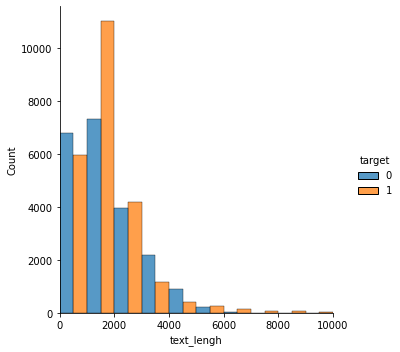

In [5]:
#Exploring: Fake News vs Real News text length
sns.displot(data=df, x="text_lengh", binwidth=1000, hue='target', multiple="dodge")
plt.xlim(left=0, right=10000) 

<AxesSubplot:ylabel='text_lengh'>

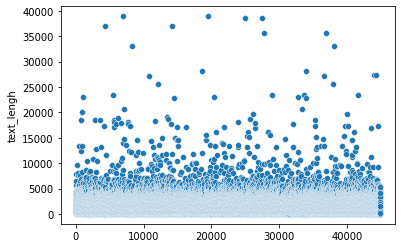

In [6]:
#Exploring: Text length outliers 

sns.scatterplot(data=df.text_lengh)

In [7]:
# By cutting the text at 10_000 words we handle 00.37% of our outliers. 
# This will be usefull when deciding the max padding to compute in order to run our deep learning model 

1 - (df['text_lengh']<=10000).sum()/df['text_lengh'].count()

0.0037863601942179637

(0.0, 10000.0)

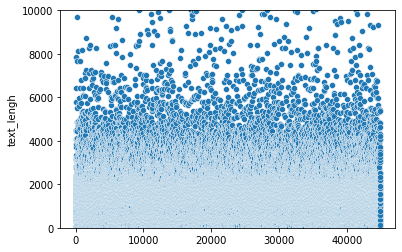

In [8]:
#Exploring: Text length without outliers 

sns.scatterplot(data=df.text_lengh)
plt.ylim(0,10000) 

## Data Exploration: Text Unique Words

In [9]:
def nunique_words(df):
    return len(set(df.split()))

#Apply nunique_words function to df, df0, df1:
df['title_nunique_words'] = df['title'].apply(nunique_words)
df['text_nunique_words'] = df['text'].apply(nunique_words)
df0['title_nunique_words'] = df0['title'].apply(nunique_words)
df0['text_nunique_words'] = df0['text'].apply(nunique_words)
df1['title_nunique_words'] = df1['title'].apply(nunique_words)
df1['text_nunique_words'] = df1['text'].apply(nunique_words)

(0.0, 2500.0)

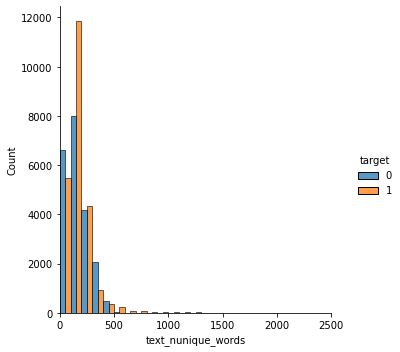

In [10]:
#Exploring: Fake News vs Real News text length

sns.displot(data=df, x="text_nunique_words", binwidth=100, hue='target', multiple="dodge")
plt.xlim(left=0, right=2500) 

<AxesSubplot:ylabel='text_nunique_words'>

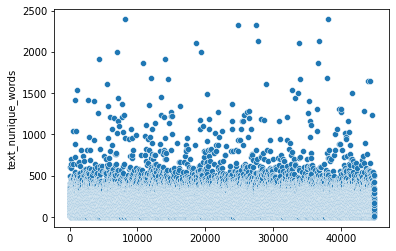

In [11]:
#Exploring: Text length outliers 

sns.scatterplot(data=df.text_nunique_words)

## Data Exploration: Analysing Subjects

[Text(0, 0, 'left-news'),
 Text(1, 0, 'politicsNews'),
 Text(2, 0, 'worldnews'),
 Text(3, 0, 'News'),
 Text(4, 0, 'US_News'),
 Text(5, 0, 'politics'),
 Text(6, 0, 'Government News'),
 Text(7, 0, 'Middle-east')]

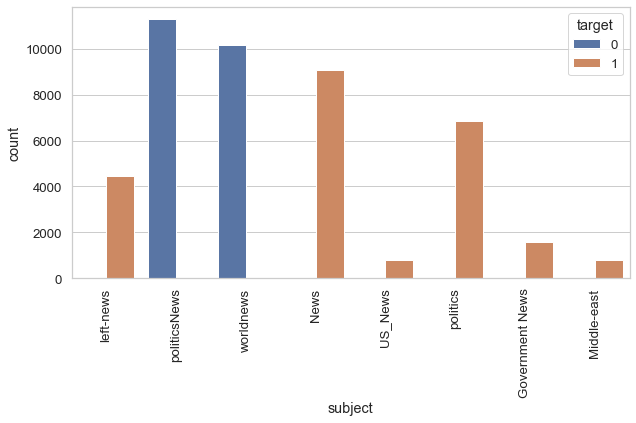

In [12]:
plt.figure(figsize = (10,5))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "target" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

## Dropping subject, Date, Title

In [13]:
#Titles are directly correlated to the target, Dropping subject
df.drop(["subject"],axis=1,inplace=True)
df0.drop(["subject"],axis=1,inplace=True)
df1.drop(["subject"],axis=1,inplace=True)

#Dropping Date
df.drop(["date"],axis=1,inplace=True)
df0.drop(["date"],axis=1,inplace=True)
df1.drop(["date"],axis=1,inplace=True)

#Dropping title
df.drop(["title"],axis=1,inplace=True)
df0.drop(["title"],axis=1,inplace=True)
df1.drop(["title"],axis=1,inplace=True)

## Data Exploration: Real News most used Words

<AxesSubplot:>

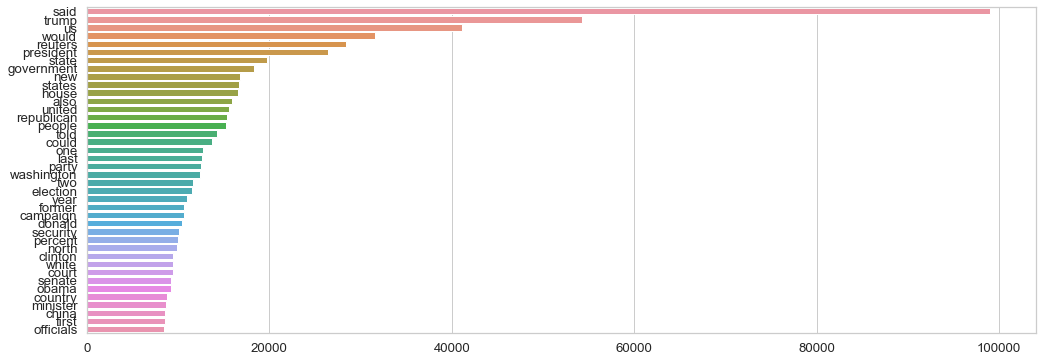

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize = (17,6))
most_common_uni = get_top_text_ngrams(df0.text,40,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))


## Data Exploration: Fake News most used Words

<AxesSubplot:>

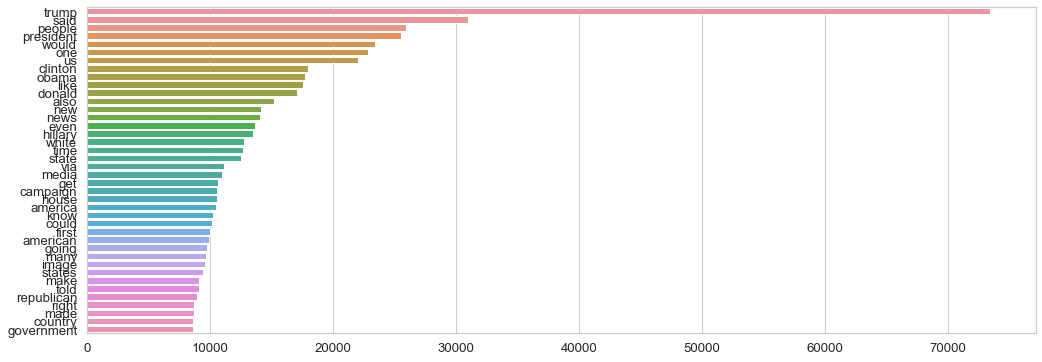

In [15]:
plt.figure(figsize = (17,6))
most_common_uni = get_top_text_ngrams(df1.text,40,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

## Data Exploration: Fake News VS Real News - Most used Words - Var

<AxesSubplot:xlabel='0', ylabel='var'>

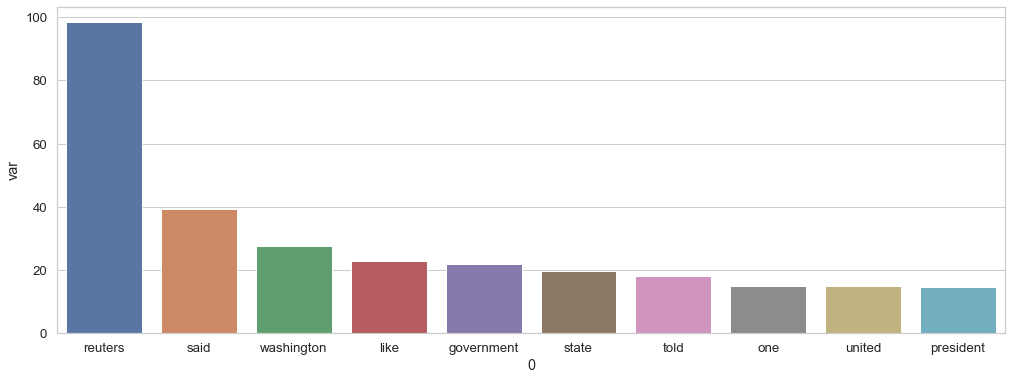

In [16]:
#Create 2 functions to analyse the top word frequency in df0 and df1
def word_frequency_df0(word):
    return (df0['text'].str.contains(word, case=False).sum()/df0['text'].count())*100

def word_frequency_df1(word):
    return (df1['text'].str.contains(word, case=False).sum()/df1['text'].count())*100

top_words_df = pd.DataFrame(get_top_text_ngrams(df.text,40,1))

top_words_df['df0%'] = top_words_df[0].apply(word_frequency_df0)
top_words_df['df1%'] = top_words_df[0].apply(word_frequency_df1)
top_words_df['var']= abs(top_words_df['df0%'] - top_words_df['df1%'])
top_words_df = top_words_df.sort_values(by='var', ascending=False)

plt.figure(figsize = (17,6))
sns.barplot(x=top_words_df[0].iloc[:10], y=top_words_df['var'])


In [17]:
#Reuters has a 99.81% presence difference between or Real News Dataset vs Fake News Dataset
df0['text'].str.contains('reuters', case=False).sum()/df0['text'].count()

0.9981790166690012

## Remove Keyword "Reuters"

In [18]:
def rem_reuters(row):
    s = row.split(' ')
    if 'reuters' in s[:10]:
        idx = s[:10].index('reuters')
        row = ' '.join(s[idx+1:]) 
    return row

df['text'] = df['text'].apply(rem_reuters)
df0['text'] = df0['text'].apply(rem_reuters)
df1['text'] = df1['text'].apply(rem_reuters)

## Split Data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.text, df.target, random_state = 42)


# Modelling

## Logistic Regression:

In [52]:
# Vectorizing and applying TF-IDF

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])# Fitting the model

model = pipe.fit(X_train, y_train)# Accuracy

prediction = model.predict(X_test)

#accuracy = (y_test.sum() - abs(prediction-y_test).sum())/y_test.sum()
#accuracy

accuracy = (y_test.count() - abs(prediction-y_test).sum())/y_test.count()
accuracy

/Users/benjaminmartin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9825389755011136

## DecisionTree Classifier: 

In [53]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)# Accuracy
prediction = model.predict(X_test)


In [54]:
accuracy = (y_test.count() - abs(prediction-y_test).sum())/y_test.count()
accuracy

0.943162583518931

## Testing on External Data

In [24]:
file = '/Users/benjaminmartin/Downloads/fake.csv'
fake_df = pd.read_csv(file)

In [25]:
fake_df = fake_df.dropna()

In [26]:

#Removing punctuation 
fake_df['text'] = fake_df['text'].apply(punctuation_removal)

def remove_numbers (text):
    words_only = ''.join([i for i in text if not i.isdigit()])
    return words_only

fake_df['text'].apply(remove_numbers)

#Convert the text to lowercase
fake_df['text'] = fake_df['text'].apply(lambda x: x.lower())

#Removing punctuation 
fake_df['text'] = fake_df['text'].apply(punctuation_removal)

#Removing Stopwords 
fake_df['text'] = fake_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


predict = model.predict(fake_df.text)

In [27]:
predict.sum()/fake_df.text.count()

0.7575499787324542

## LSTM Model

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# the model will remember only the top 2000 most common words
max_words = 2000
#max_len = 400
token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train.values)
sequences = token.texts_to_sequences(X_train.values)
train_sequences_padded = pad_sequences(sequences) #maxlen=max_len

In [23]:
train_sequences_padded

array([[   0,    0,    0, ...,  141,  114,  529],
       [   0,    0,    0, ...,   76, 1859,  561],
       [   0,    0,    0, ...,    4,  197, 1016],
       ...,
       [   0,    0,    0, ...,   16, 1360,  575],
       [   0,    0,    0, ...,   76,  275,  355],
       [   0,    0,    0, ...,  294,   76,  151]], dtype=int32)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, LSTM, Dropout
embed_dim = 50
lstm_out = 64
batch_size = 32
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_words, embed_dim)) #, input_length = max_len
LSTM_model.add(LSTM(lstm_out))
LSTM_model.add(Dense(256))
LSTM_model.add(Activation('relu'))
LSTM_model.add(Dropout(0.5))
#model.add(Dense(1, name='out_layer'))
LSTM_model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))
LSTM_model.compile(loss = 'binary_crossentropy', optimizer='adam',\
               metrics = ['accuracy'])

print(LSTM_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          100000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
__________________________________________________

In [38]:
LSTM_model.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs = 5, validation_split=0.2)

Epoch 1/5
842/842 [==============================] - 1343s 2s/step - loss: 0.1326 - accuracy: 0.9531 - val_loss: 0.0823 - val_accuracy: 0.9710
Epoch 2/5
842/842 [==============================] - 1737s 2s/step - loss: 0.0838 - accuracy: 0.9703 - val_loss: 0.0517 - val_accuracy: 0.9852
Epoch 3/5
842/842 [==============================] - 1368s 2s/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0628 - val_accuracy: 0.9816
Epoch 4/5
842/842 [==============================] - 1341s 2s/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.1060 - val_accuracy: 0.9589
Epoch 5/5
842/842 [==============================] - 1460s 2s/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0543 - val_accuracy: 0.9865


In [39]:
from sklearn.externals import joblib
from datetime import datetime
now = datetime.now()
filename =  "LSTM_pong_model_" + now.strftime("%Y-%m-%d__%H-%M-%S") + ".h5"

LSTM_model.save(filename)



In [55]:
from tensorflow.keras.models import load_model
m = load_model('LSTM.h5')
m.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, None, 50)          250       
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               16640     
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 46,587
Trainable params: 46,587
Non-trainable params: 0
_________________________________________________

In [58]:
#test123 = 'WASHINGTON, D.C. — A review of FBI Director James Comey’s professional history and relationships shows that the Obama cabinet leader — now under fire for his handling of the investigation of Hillary Clinton — is deeply entrenched in the big-money cronyism culture of Washington, D.C. His personal and professional relationships — all undisclosed as he announced the Bureau would not prosecute Clinton — reinforce bipartisan concerns that he may have politicized the criminal probe.'

#Removing punctuation 
#test123 = test123['text'].apply(punctuation_removal)

# fake_df['text'].apply(remove_numbers)

# #Convert the text to lowercase
# fake_df['text'] = fake_df['text'].apply(lambda x: x.lower())

# #Removing punctuation 
# fake_df['text'] = fake_df['text'].apply(punctuation_removal)

# #Removing Stopwords 
# fake_df['text'] = fake_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test_sequences = token.texts_to_sequences(X_test)

test_sequences_padded = pad_sequences(test_sequences)

X_test_predict = model.predict(test_sequences_padded)
X_test_predict

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
X_test_predict = X_test_predict.round()
X_test_predict

In [ ]:
(abs(X_test_predict-y_test.values).sum())/y_test.count()

In [ ]:
diff_y_x_test = abs(X_test_predict.flatten()-y_test.values).sum()/y_test.count()
(1 - diff_y_x_test) * 100

In [ ]:
y = 11225


In [25]:

for i in [2 , 3, 4, 5, 10, 300, 800, 1500, 2000]:
    max_words = i
    token = Tokenizer(num_words=max_words, lower=True, split=' ')
    token.fit_on_texts(X_train.values)
    sequences = token.texts_to_sequences(X_train.values)
    train_sequences_padded = pad_sequences(sequences) 
    embed_dim = 50
    lstm_out = 64
    batch_size = 32
    model = Sequential()
    model.add(Embedding(max_words, embed_dim)) 
    model.add(LSTM(lstm_out))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    model.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs = 1, validation_split=0.2)


KeyboardInterrupt: 

In [26]:
x_graph = [2 , 3, 4, 5, 10, 300, 800, 1500, 2000]
y_graph = [74.11, 76.99, 78.19, 78.01, 80.74, 93.00, 94.17, 95.15, 95.20]

/Users/benjaminmartin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

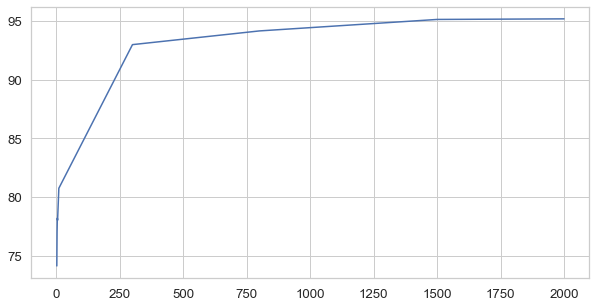

In [31]:
plt.figure(figsize = (10,5))
sns.lineplot(x_graph, y_graph)

In [32]:
stop


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df.text.mean()

In [ ]:
df